In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from polar_mnist.io import get_train_loader, get_test_loader
from polar_mnist.model import CNN1D, train_model, test_model

## Train the Model

In [2]:
train = get_train_loader(batch_size=64, shuffle=True)
test = get_test_loader(batch_size=64)

In [3]:
model = CNN1D()
train_model(
    model,
    train_loader=train,
    num_epochs=10,
    learning_rate=0.001,
);

Epoch [1/10], Step [100/938], Train loss: 1.5979
Epoch [1/10], Step [200/938], Train loss: 1.5506
Epoch [1/10], Step [300/938], Train loss: 1.6327
Epoch [1/10], Step [400/938], Train loss: 1.5910
Epoch [1/10], Step [500/938], Train loss: 1.5493
Epoch [1/10], Step [600/938], Train loss: 1.5835
Epoch [1/10], Step [700/938], Train loss: 1.5110
Epoch [1/10], Step [800/938], Train loss: 1.5173
Epoch [1/10], Step [900/938], Train loss: 1.5870
Epoch [2/10], Step [100/938], Train loss: 1.5513
Epoch [2/10], Step [200/938], Train loss: 1.5819
Epoch [2/10], Step [300/938], Train loss: 1.5228
Epoch [2/10], Step [400/938], Train loss: 1.5473
Epoch [2/10], Step [500/938], Train loss: 1.5285
Epoch [2/10], Step [600/938], Train loss: 1.5729
Epoch [2/10], Step [700/938], Train loss: 1.6071
Epoch [2/10], Step [800/938], Train loss: 1.5236
Epoch [2/10], Step [900/938], Train loss: 1.5830
Epoch [3/10], Step [100/938], Train loss: 1.4917
Epoch [3/10], Step [200/938], Train loss: 1.5664
Epoch [3/10], Step [

## Check Test Accuracy

In [4]:
test_model(model, test_loader=test);

Test Accuracy: 95.23%


## Plot Confusion Matrix

In [5]:
confusion_matrix = torch.zeros(10, 10)
with torch.no_grad():
    for i, (imgs, labels) in enumerate(test):
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(labels.view(-1), preds.view(-1)):
            confusion_matrix[t.long(), p.long()] += 1

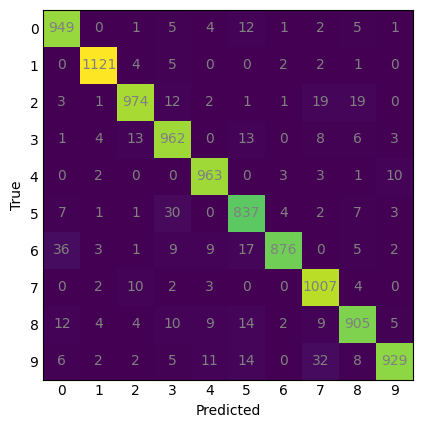

In [6]:
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap="viridis")

for (i, j), val in np.ndenumerate(confusion_matrix):
    ax.text(
        j, i, f"{val:.0f}", ha="center", va="center", color="grey", fontweight="normal"
    )

ax.set_xticks(range(10))
ax.set_yticks(range(10))
ax.tick_params(length=0)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.xaxis.set_ticks_position("bottom")